In [51]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [52]:
data = pd.read_csv("./data.csv", on_bad_lines='skip')

In [53]:
data.shape

(1310, 64)

In [54]:
arr = np.array(data.values)

In [55]:
columns = [
    'class',
]
for i in range(1,64):
    columns.append(f'{i}')

In [56]:
len(columns)

64

In [57]:
data = pd.DataFrame(arr, columns=columns)

In [58]:
data

,class,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.0,0.468167,0.807778,6.390462e-07,0.535716,0.775360,-0.046226,0.581934,0.701189,-0.059497,...,-0.034453,0.366955,0.614021,-0.072205,0.366500,0.591357,-0.089444,0.364600,0.593469,-0.096780
1,1.0,0.438491,0.774654,6.912893e-07,0.508975,0.752393,-0.056626,0.550691,0.684223,-0.082184,...,-0.020003,0.340815,0.550034,-0.063120,0.358630,0.578905,-0.060223,0.370799,0.622038,-0.045314
2,1.0,0.438491,0.774654,6.912893e-07,0.508975,0.752393,-0.056626,0.550691,0.684223,-0.082184,...,-0.020003,0.340815,0.550034,-0.063120,0.358630,0.578905,-0.060223,0.370799,0.622038,-0.045314
3,1.0,0.438491,0.774654,6.912893e-07,0.508975,0.752393,-0.056626,0.550691,0.684223,-0.082184,...,-0.020003,0.340815,0.550034,-0.063120,0.358630,0.578905,-0.060223,0.370799,0.622038,-0.045314
4,1.0,0.432156,0.787208,7.377377e-07,0.505253,0.756320,-0.066840,0.547114,0.687777,-0.099807,...,-0.016191,0.342309,0.551438,-0.060685,0.359726,0.583720,-0.057118,0.372313,0.627548,-0.041759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.505801,0.905159,-1.308441e-06,0.525166,0.693556,-0.039460,0.565048,0.517981,-0.071740,...,-0.152048,0.485683,0.855592,-0.198942,0.513831,0.870768,-0.186917,0.576706,0.882065,-0.172199
1306,3.0,0.505801,0.905159,-1.308441e-06,0.525166,0.693556,-0.039460,0.565048,0.517981,-0.071740,...,-0.152048,0.485683,0.855592,-0.198942,0.513831,0.870768,-0.186917,0.576706,0.882065,-0.172199
1307,3.0,0.824080,0.862276,-8.094534e-07,0.779914,0.689209,-0.010876,0.693225,0.531408,-0.052998,...,-0.262341,0.463135,0.806514,-0.309388,0.433140,0.813818,-0.288746,0.474578,0.824725,-0.269851
1308,3.0,0.824080,0.862276,-8.094534e-07,0.779914,0.689209,-0.010876,0.693225,0.531408,-0.052998,...,-0.262341,0.463135,0.806514,-0.309388,0.433140,0.813818,-0.288746,0.474578,0.824725,-0.269851


In [59]:
y = data['class']
x = data.drop(['class'], axis=1)

In [60]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [61]:
X_train.shape

(917, 63)

## RandomForestClassifier

In [62]:
rtree = RandomForestClassifier(100)
rtree.fit(X_train, y_train)
prediction = rtree.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       151
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        87
         3.0       1.00      1.00      1.00       117

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



In [65]:
ConfusionMatrix = confusion_matrix(y_test,prediction)

<AxesSubplot:>

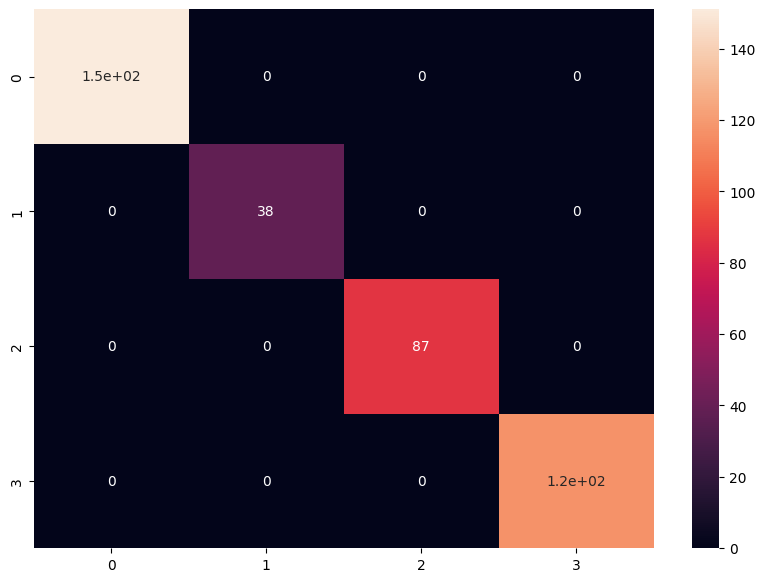

In [66]:
plt.figure(figsize = (10,7))
sn.heatmap(ConfusionMatrix, annot=True)

# SVC

In [67]:
svc = SVC()
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       151
         1.0       1.00      0.84      0.91        38
         2.0       1.00      0.99      0.99        87
         3.0       1.00      0.99      1.00       117

    accuracy                           0.98       393
   macro avg       0.99      0.96      0.97       393
weighted avg       0.98      0.98      0.98       393



In [69]:
ConfusionMatrix = confusion_matrix(y_test,prediction)

<AxesSubplot:>

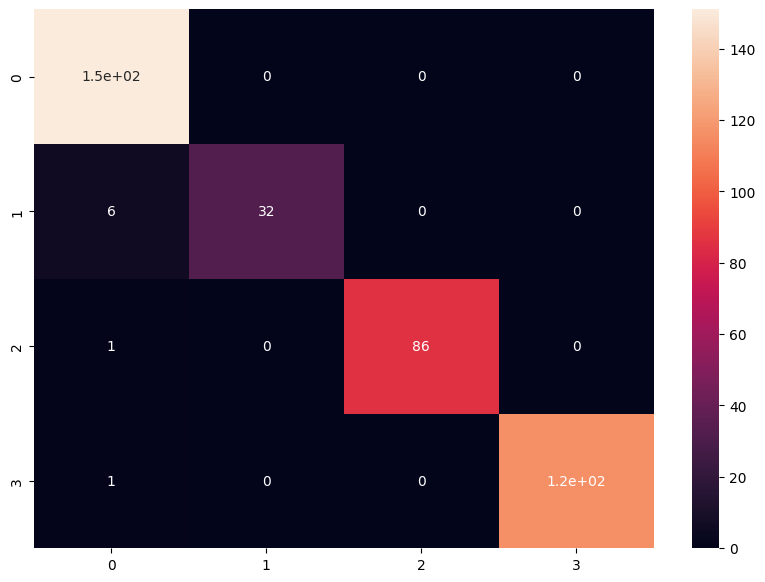

In [70]:
plt.figure(figsize = (10,7))
sn.heatmap(ConfusionMatrix, annot=True)

## DecisionTree

In [71]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)

In [72]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       151
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        87
         3.0       1.00      0.99      1.00       117

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



# LogisticRegression

In [73]:
logistic = LogisticRegression(penalty='l2', solver="lbfgs",multi_class="auto")
logistic.fit(X_train, y_train)
prediction = logistic.predict(X_test)

C:\Users\udits\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       151
         1.0       0.97      0.84      0.90        38
         2.0       1.00      0.98      0.99        87
         3.0       1.00      0.98      0.99       117

    accuracy                           0.97       393
   macro avg       0.98      0.95      0.96       393
weighted avg       0.98      0.97      0.97       393



## Deep learning model

In [75]:
import tensorflow as tf
from tensorflow.keras import Sequential


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, activation="relu", input_shape=(63,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),
])

model.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              131072    
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 2,757,126
Trainable params: 2,757,126
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
29/29 [==============================] - 2s 75ms/step - loss: 0.2329 - accuracy: 0.9160 - val_loss: 0.1221 - val_accuracy: 0.9873
Epoch 2/2
29/29 [==============================] - 2s 79ms/step - loss: 0.2104 - accuracy: 0.9095 - val_loss: 0.1541 - val_accuracy: 0.9567


In [57]:
model.save("./model")

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets
